In [1]:
import tensorflow as tf
import tensorflow.python.keras as keras
import numpy as np
import matplotlib.pyplot as pyplot
import os
import datetime

### Reading images

In [2]:
n_samples = 1200 #CHANGED SAMPLES
sample_path = 'samples/'
count = 0
read = []
x = np.zeros((n_samples, 3, 256, 256, 3))
y = np.zeros((n_samples, 1, 256, 256, 3))
for imgPath in os.listdir("samples/"):
    if count >= n_samples:
        break
    for image in os.listdir("samples/"+imgPath+"/"):
        try:
            if count >= n_samples:
                break
            currentID = image.split('_')[0]
            if currentID in read:
                continue
            read.append(currentID)
            img0 = pyplot.imread(sample_path+imgPath+"/"+image)
            img1 = pyplot.imread(sample_path+imgPath+"/"+image.replace('_0', '_1'))
            img2 = pyplot.imread(sample_path+imgPath+"/"+image.replace('_0', '_2'))
            img3 = pyplot.imread(sample_path+imgPath+"/"+image.replace('_0', '_3'))
            x[count, 0, :, :, :] = img1[:, :, 0:3]
            x[count, 1, :, :, :] = img2[:, :, 0:3]
            x[count, 2, :, :, :] = img3[:, :, 0:3]
            y[count, 0, :, :, :] = img0[:, :, 0:3]
            count += 1
        except:
            print('error on file:', image)
            continue

### Defining input type

In [3]:
x_input = keras.Input((3, None, None, 3)) # vhodna slika

## Simple CNN

In [4]:
simple_layer_1 = keras.layers.Convolution2D(
    filters=16,
    kernel_size=(5,5),
    padding='same',
    activation='relu',
    use_bias=True,
)
simple_layer_2 = keras.layers.Convolution2D(
    filters=4,
    kernel_size=(5,5),
    padding='same',
    activation='relu',
    use_bias=True,
)
simple_layer_3 = keras.layers.Convolution2D(
    filters=3,
    kernel_size=(5,5),
    padding='same',
    activation='sigmoid',
    use_bias=True,
)

x_low_simple = x_input[:,0,:,:,:]
x_mid_simple = x_input[:,1,:,:,:]
x_high_simple = x_input[:,2,:,:,:]


x_low1_simple = simple_layer_1(x_low_simple)
x_mid1_simple = simple_layer_1(x_mid_simple)
x_high1_simple = simple_layer_1(x_high_simple)

x_low2_simple = simple_layer_2(x_low1_simple)
x_mid2_simple = simple_layer_2(x_mid1_simple)
x_high2_simple = simple_layer_2(x_high1_simple)

x_concat_simple = keras.layers.Concatenate()([x_low2_simple, x_mid2_simple, x_high2_simple])
x_out_simple = simple_layer_3(x_concat_simple)

model_simple = keras.Model(inputs=x_input, outputs=x_out_simple)

Metal device set to: Apple M1 Max


2022-05-24 11:59:01.606239: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-24 11:59:01.606374: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Compiling the model

In [5]:
model_simple.compile(
    optimizer='adam',
    loss='mae', 
)

### Fitting the model

In [6]:
log_dir = "logs/simple/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
x_inp_simple = x
y_inp_simple = y
model_simple.fit(
    x=x_inp_simple,
    y=y_inp_simple,
    batch_size=2,
    epochs=20,
    validation_split=0.1,
    callbacks=[tensorboard_callback]
)

2022-05-24 11:59:07.375099: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-24 11:59:07.561087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
540/540 [==============================] - ETA: 0s - loss: 0.2545

2022-05-24 11:59:32.511225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


540/540 [==============================] - 26s 47ms/step - loss: 0.2545 - val_loss: 0.0051
Epoch 2/20
540/540 [==============================] - 25s 46ms/step - loss: 0.2313 - val_loss: 0.0015
Epoch 3/20
540/540 [==============================] - 25s 46ms/step - loss: 0.2257 - val_loss: 5.9651e-04
Epoch 4/20
540/540 [==============================] - 25s 46ms/step - loss: 0.2245 - val_loss: 9.3480e-04
Epoch 5/20
540/540 [==============================] - 25s 46ms/step - loss: 0.2202 - val_loss: 5.1929e-04
Epoch 6/20
540/540 [==============================] - 25s 46ms/step - loss: 0.2164 - val_loss: 2.7704e-04
Epoch 7/20
540/540 [==============================] - 25s 46ms/step - loss: 0.2199 - val_loss: 1.3107e-04
Epoch 8/20
540/540 [==============================] - 25s 46ms/step - loss: 0.2243 - val_loss: 1.9223e-04
Epoch 9/20
540/540 [==============================] - 25s 46ms/step - loss: 0.2222 - val_loss: 2.1309e-04
Epoch 10/20
540/540 [==============================] - 25s 46ms/s

### Results - simple CNN

2022-05-24 12:12:52.830680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


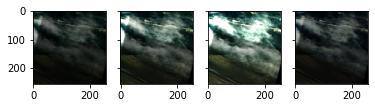

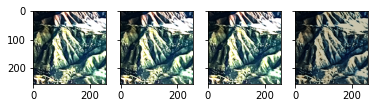

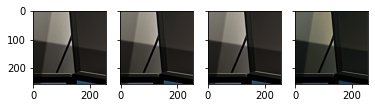

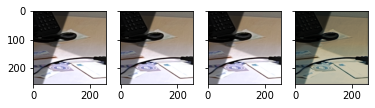

In [7]:
n = 11
i = x[n:n+1]
predict = model_simple.predict(i)
fig, ax = pyplot.subplots(1, 4, sharex=True, sharey=True)
ax = ax.ravel()
ax[0].imshow(i[0, 0, :, :, :])
ax[1].imshow(i[0, 1, :, :, :])
ax[2].imshow(i[0, 2, :, :, :])
ax[3].imshow(predict[0, :, :, :])

n = 35
i = x[n:n+1]
predict = model_simple.predict(i)
fig, ax = pyplot.subplots(1, 4, sharex=True, sharey=True)
ax = ax.ravel()
ax[0].imshow(i[0, 0, :, :, :])
ax[1].imshow(i[0, 1, :, :, :])
ax[2].imshow(i[0, 2, :, :, :])
ax[3].imshow(predict[0, :, :, :])

n = 201
i = x[n:n+1]
predict = model_simple.predict(i)
fig, ax = pyplot.subplots(1, 4, sharex=True, sharey=True)
ax = ax.ravel()
ax[0].imshow(i[0, 0, :, :, :])
ax[1].imshow(i[0, 1, :, :, :])
ax[2].imshow(i[0, 2, :, :, :])
ax[3].imshow(predict[0, :, :, :])

n = 410
i = x[n:n+1]
predict = model_simple.predict(i)
fig, ax = pyplot.subplots(1, 4, sharex=True, sharey=True)
ax = ax.ravel()
ax[0].imshow(i[0, 0, :, :, :])
ax[1].imshow(i[0, 1, :, :, :])
ax[2].imshow(i[0, 2, :, :, :])
ax[3].imshow(predict[0, :, :, :])

## Complex CNN

In [22]:
complex_layer_1 = keras.layers.Convolution2D(
    filters=16,
    kernel_size=5,
    padding='same',
    activation='relu',
    use_bias=True,
)
complex_layer_2 = keras.layers.Convolution2D(
    filters=1,
    kernel_size=5,
    padding='same',
    activation='linear',
    use_bias=True,
)

x_low_complex = x_input[:,0,:,:,:]
x_mid_complex = x_input[:,1,:,:,:]
x_high_complex = x_input[:,2,:,:,:]

x_low1_complex = complex_layer_1(x_low_complex)
x_mid1_complex = complex_layer_1(x_mid_complex)
x_high1_complex = complex_layer_1(x_high_complex)

x_low2_complex = complex_layer_2(x_low1_complex) # weight image
x_mid2_complex = complex_layer_2(x_mid1_complex) # weight image
x_high2_complex = complex_layer_2(x_high1_complex) # weight image

x_concat_complex = keras.layers.Concatenate()([x_low2_complex, x_mid2_complex, x_high2_complex])
x_softmax = keras.activations.softmax(x_concat_complex)

# x_multiplied_low = keras.layers.Multiply()([x_low_complex, x_softmax[:,:,:,0]])
# x_multiplied_mid = keras.layers.Multiply()([x_mid_complex, x_softmax[:,:,:,1]])
# x_multiplied_high = keras.layers.Multiply()([x_high_complex, x_softmax[:,:,:,2]])
#we need this so we can multiply (this makes the dimensions equal as x_multiplied)
softmax_by_layers_low = tf.stack([x_softmax[...,0],x_softmax[...,0],x_softmax[...,0]], axis=3)
softmax_by_layers_mid = tf.stack([x_softmax[...,1],x_softmax[...,1],x_softmax[...,1]], axis=3)
softmax_by_layers_high = tf.stack([x_softmax[...,2],x_softmax[...,2],x_softmax[...,2]], axis=3)

# x_multiplied_low = x_low_complex * softmax_by_layers_low
# x_multiplied_mid = x_mid_complex * softmax_by_layers_mid
# x_multiplied_high = x_high_complex * softmax_by_layers_high
x_multiplied_low = keras.layers.multiply([x_low_complex, softmax_by_layers_low])
x_multiplied_mid = keras.layers.multiply([x_mid_complex, softmax_by_layers_mid])
x_multiplied_high = keras.layers.multiply([x_high_complex, softmax_by_layers_high])

# '''Add all three layers together into one'''
x_out_complex = keras.layers.add([x_multiplied_low, x_multiplied_mid, x_multiplied_high])
#x_out_complex = x_multiplied_low + x_multiplied_mid + x_multiplied_high

model_complex = keras.Model(inputs=x_input, outputs=x_out_complex)
model_complex_test = keras.Model(inputs=x_input, outputs=[x_softmax, x_out_complex])

KeyboardInterrupt: 

### Compiling the model

In [9]:
# priprava na ucenje
model_complex.compile(
    optimizer='adam',
    loss='mae', 
)

### Fitting the model

In [10]:
log_dir = "logs/complex/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
x_inp_complex = x
y_inp_complex = y
model_complex.fit(
    x=x_inp_complex,
    y=y_inp_complex,
    batch_size=16,
    epochs=20,
    validation_split=0.1,
    callbacks=[tensorboard_callback]
)

/Users/plesasta_pevka/repos/solo-projects/python_projects/cnn_images/venv/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/20


2022-05-24 12:13:04.687287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - ETA: 0s - loss: 0.3655

2022-05-24 12:13:17.649353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 14s 193ms/step - loss: 0.3655 - val_loss: 0.0000e+00
Epoch 2/20
68/68 [==============================] - 12s 176ms/step - loss: 0.3641 - val_loss: 0.0000e+00
Epoch 3/20
68/68 [==============================] - 12s 174ms/step - loss: 0.3654 - val_loss: 0.0000e+00
Epoch 4/20
68/68 [==============================] - 12s 174ms/step - loss: 0.3649 - val_loss: 0.0000e+00
Epoch 5/20
68/68 [==============================] - 12s 173ms/step - loss: 0.3646 - val_loss: 0.0000e+00
Epoch 6/20
68/68 [==============================] - 12s 173ms/step - loss: 0.3654 - val_loss: 0.0000e+00
Epoch 7/20
68/68 [==============================] - 12s 175ms/step - loss: 0.3657 - val_loss: 0.0000e+00
Epoch 8/20
68/68 [==============================] - 12s 173ms/step - loss: 0.3644 - val_loss: 0.0000e+00
Epoch 9/20
68/68 [==============================] - 12s 174ms/step - loss: 0.3669 - val_loss: 0.0000e+00
Epoch 10/20
68/68 [==============================] - 12s 174ms/ste

### Results - complex CNN

2022-05-24 12:17:07.392418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


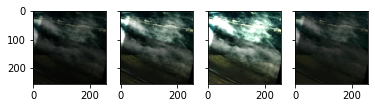

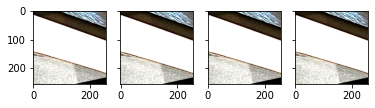

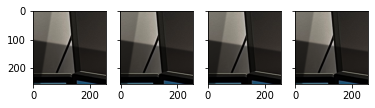

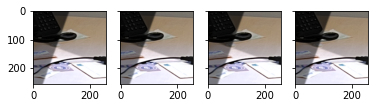

In [11]:
n = 11
i = x[n:n+1]
predict = model_complex.predict(i)
fig, ax = pyplot.subplots(1, 4, sharex=True, sharey=True)
ax = ax.ravel()
ax[0].imshow(i[0, 0, :, :, :])
ax[1].imshow(i[0, 1, :, :, :])
ax[2].imshow(i[0, 2, :, :, :])
ax[3].imshow(predict[0, :, :, :])

n = 14
i = x[n:n+1]
predict = model_complex.predict(i)
fig, ax = pyplot.subplots(1, 4, sharex=True, sharey=True)
ax = ax.ravel()
ax[0].imshow(i[0, 0, :, :, :])
ax[1].imshow(i[0, 1, :, :, :])
ax[2].imshow(i[0, 2, :, :, :])
ax[3].imshow(predict[0, :, :, :])

n = 201
i = x[n:n+1]
predict = model_complex.predict(i)
fig, ax = pyplot.subplots(1, 4, sharex=True, sharey=True)
ax = ax.ravel()
ax[0].imshow(i[0, 0, :, :, :])
ax[1].imshow(i[0, 1, :, :, :])
ax[2].imshow(i[0, 2, :, :, :])
ax[3].imshow(predict[0, :, :, :])

n = 410
i = x[n:n+1]
predict = model_complex.predict(i)
fig, ax = pyplot.subplots(1, 4, sharex=True, sharey=True)
ax = ax.ravel()
ax[0].imshow(i[0, 0, :, :, :])
ax[1].imshow(i[0, 1, :, :, :])
ax[2].imshow(i[0, 2, :, :, :])
ax[3].imshow(predict[0, :, :, :])

### Demo

In [12]:
demo11 = pyplot.imread('example/11.jpg')/255
demo12 = pyplot.imread('example/12.jpg')/255
demo13 = pyplot.imread('example/13.jpg')/255

demo21 = pyplot.imread('example/21.jpg')/255
demo22 = pyplot.imread('example/22.jpg')/255
demo23 = pyplot.imread('example/23.jpg')/255

demo31 = pyplot.imread('example/31.jpg')/255
demo32 = pyplot.imread('example/32.jpg')/255
demo33 = pyplot.imread('example/33.jpg')/255


x_demo1 = np.zeros((1, 3, demo11.shape[0], demo11.shape[1], 3))
x_demo1[0, 0, :, :, :] = demo11[:, :, 0:3]
x_demo1[0, 1, :, :, :] = demo12[:, :, 0:3]
x_demo1[0, 2, :, :, :] = demo13[:, :, 0:3]

x_demo2 = np.zeros((1, 3, demo21.shape[0], demo21.shape[1], 3))
x_demo2[0, 0, :, :, :] = demo21[:, :, 0:3]
x_demo2[0, 1, :, :, :] = demo22[:, :, 0:3]
x_demo2[0, 2, :, :, :] = demo23[:, :, 0:3]

x_demo3 = np.zeros((1, 3, demo31.shape[0], demo31.shape[1], 3))
x_demo3[0, 0, :, :, :] = demo31[:, :, 0:3]
x_demo3[0, 1, :, :, :] = demo32[:, :, 0:3]
x_demo3[0, 2, :, :, :] = demo33[:, :, 0:3]


predictS1 = model_simple.predict(x_demo1)
predictC1 = model_complex.predict(x_demo1)
predictC1Weightstest, predictC1TEST = model_complex_test.predict(x_demo1)

predictS2 = model_simple.predict(x_demo2)
predictC2 = model_complex.predict(x_demo2)

predictS3 = model_simple.predict(x_demo3)
predictC3 = model_complex.predict(x_demo3)



2022-05-24 12:17:10.164660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-24 12:17:10.287788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2022-05-24 12:17:10.420878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


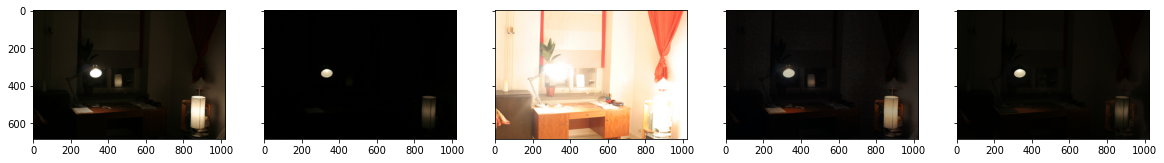

In [13]:
fig, ax = pyplot.subplots(1, 5, sharex=True, sharey=True, figsize=(20, 10))
ax = ax.ravel()
ax[0].imshow(demo11)
ax[1].imshow(demo12)
ax[2].imshow(demo13)
ax[3].imshow(predictS1[0, :, :, :])
ax[4].imshow(predictC1[0, :, :, :])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 683, 1024, 3)


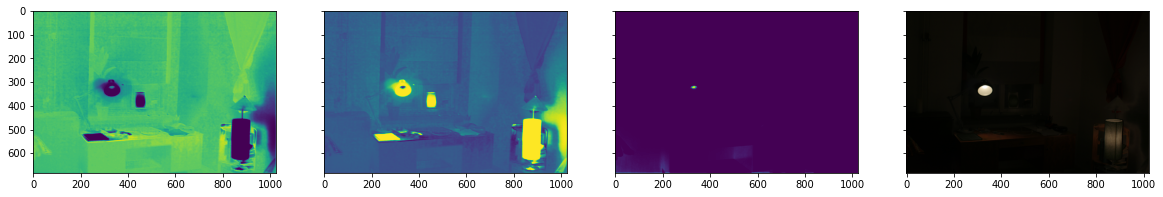

In [14]:
fig, ax = pyplot.subplots(1, 4, sharex=True, sharey=True, figsize=(20, 10))
ax = ax.ravel()
print(predictC1Weightstest.shape)
ax[0].imshow(predictC1Weightstest[0,:,:,0])
ax[1].imshow(predictC1Weightstest[0,:,:,1])
ax[2].imshow(predictC1Weightstest[0,:,:,2])
ax[3].imshow(predictC1[0, :, :, :])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


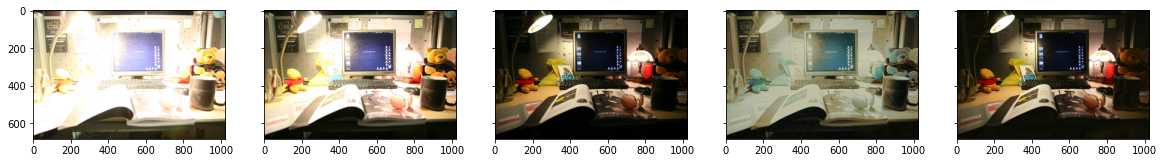

In [15]:
fig, ax = pyplot.subplots(1, 5, sharex=True, sharey=True, figsize=(20, 10))
ax = ax.ravel()
ax[0].imshow(demo21)
ax[1].imshow(demo22)
ax[2].imshow(demo23)
ax[3].imshow(predictS2[0, :, :, :])
ax[4].imshow(predictC2[0, :, :, :])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


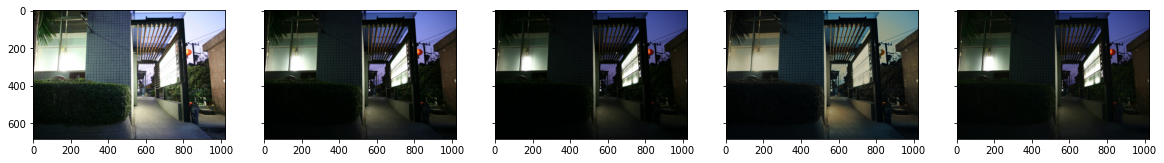

In [16]:
fig, ax = pyplot.subplots(1, 5, sharex=True, sharey=True, figsize=(20, 10))
ax = ax.ravel()
ax[0].imshow(demo31)
ax[1].imshow(demo32)
ax[2].imshow(demo33)
ax[3].imshow(predictS3[0, :, :, :])
ax[4].imshow(predictC3[0, :, :, :])

In [17]:
model_simple.summary(line_length=120)

Model: "model"
________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
input_1 (InputLayer)                   [(None, 3, None, None, 3)] 0                                                     
________________________________________________________________________________________________________________________
tf.__operators__.getitem (SlicingOpLam (None, None, None, 3)      0             input_1[0][0]                           
________________________________________________________________________________________________________________________
tf.__operators__.getitem_1 (SlicingOpL (None, None, None, 3)      0             input_1[0][0]                           
________________________________________________________________________________________________________________________
tf.__operators__.

In [18]:
model_complex.summary(line_length=120)

Model: "model_1"
________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
input_1 (InputLayer)                   [(None, 3, None, None, 3)] 0                                                     
________________________________________________________________________________________________________________________
tf.__operators__.getitem_3 (SlicingOpL (None, None, None, 3)      0             input_1[0][0]                           
________________________________________________________________________________________________________________________
tf.__operators__.getitem_4 (SlicingOpL (None, None, None, 3)      0             input_1[0][0]                           
________________________________________________________________________________________________________________________
tf.__operators_

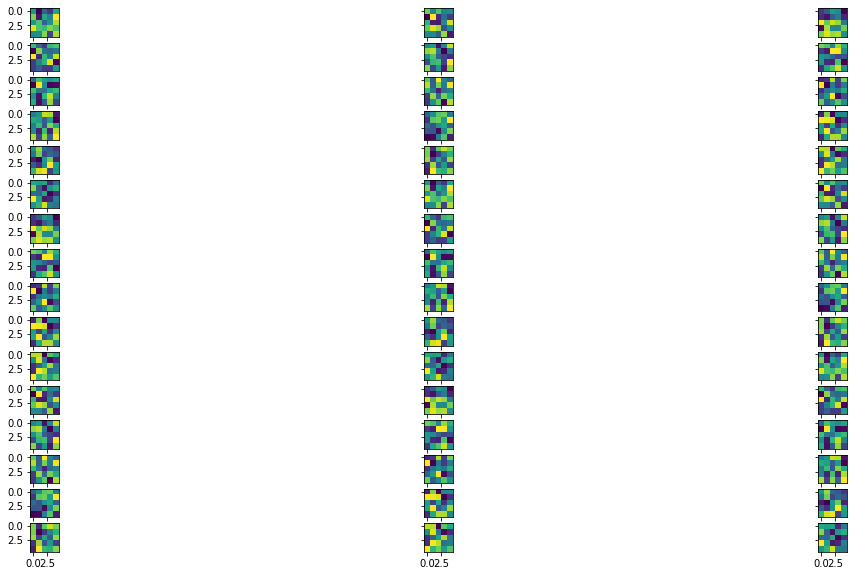

In [19]:
fig, ax = pyplot.subplots(16, 3, sharex=True, sharey=True, figsize=(20, 10))
ax = ax.ravel()
# ax[0].imshow(demo11)
# ax[1].imshow(demo12)
# ax[2].imshow(demo13)
# ax[3].imshow(predictS1[0, :, :, :])
# ax[4].imshow(predictC1[0, :, :, :])
x1w = model_complex.get_weights()[0]


    #pyplot.subplot(1,3,i-1)
for i in range(3*16):
    indexMod16 = i%16
    ax[i].imshow(x1w[:,:,0,indexMod16] * 255, interpolation='nearest')
    ax[i].imshow(x1w[:,:,1,indexMod16] * 255, interpolation='nearest')
    ax[i].imshow(x1w[:,:,2,indexMod16] * 255, interpolation='nearest')
    #pyplot.imshow(x1w[:,:,:,i],interpolation="nearest",cmap="gray")


pyplot.show()

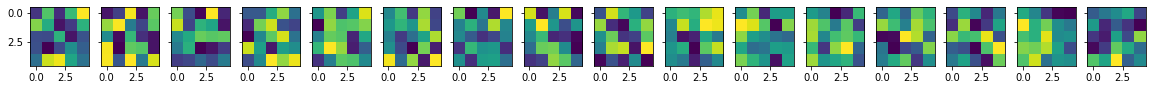

In [20]:
fig, ax = pyplot.subplots(1, 16, sharex=True, sharey=True, figsize=(20, 10))
ax = ax.ravel()
# ax[0].imshow(demo11)
# ax[1].imshow(demo12)
# ax[2].imshow(demo13)
# ax[3].imshow(predictS1[0, :, :, :])
# ax[4].imshow(predictC1[0, :, :, :])
x1w = model_complex.get_weights()[2]

for i in range(0,16):
    #pyplot.subplot(1,3,i-1)
    ax[i-1].imshow(x1w[:,:,i,0] * 255, interpolation='nearest')
    #pyplot.imshow(x1w[:,:,:,i],interpolation="nearest",cmap="gray")
pyplot.show()